# Given a data set of the 1,000 most popular movies on IMDB in the last 10 years, can you predict the revenue of a given movie?

In [1]:
%pylab inline
%matplotlib notebook
import sklearn
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### 1. Download the data programatically with python.

(Hint: To generate your own kaggle.json file go to your profile -> account -> Create new API Token, and then place the file it in ~/.kaggle/)

In [2]:
# Follow the guide on: "https://www.kaggle.com/docs/api" to be able to get access to kaggle. Otherwise the code wont work.
!kaggle datasets download "PromptCloudHQ/imdb-data" 

imdb-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("./imdb-data.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()


### 2. Fit the training-data into a model, present it visually and reflect on wether it is a good fit or not.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


df = pd.read_csv("IMDB-Movie-Data.csv")
# Drop rows that has missing values
df = df.dropna()

# Extract y-values
y_value_revenue = df["Revenue (Millions)"]

# Extract individual x-values from columns
x_no_revenue = df.drop("Revenue (Millions)", 1)
x_rating = np.array(df["Rating"]).reshape(-1,1)
x_year = np.array(df["Year"]).reshape(-1,1)
x_metascore = np.array(df["Metascore"]).reshape(-1,1)
x_runtime = np.array(df["Runtime (Minutes)"]).reshape(-1,1)
x_votes = np.array(df["Votes"]).reshape(-1,1)

# Change str's to floats, so we can fit the data
for column in x_no_revenue.columns:
    if x_no_revenue[column].dtype == type(str):
        le = LabelEncoder()
        x_no_revenue[column] = le.fit_transform(x_no_revenue[column])

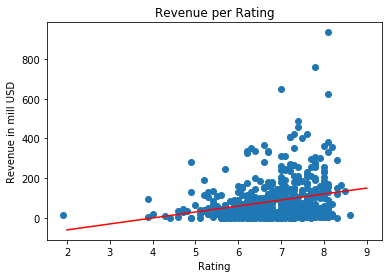

In [26]:
# Plot rating

# Split values into training (2/3 of datasize) and testing (1/3 of datasize) data
x_train_rating, x_test_rating, y_train_rating, y_test_rating = train_test_split(x_rating, y_value_revenue, test_size = (1/3), train_size = (2/3))

model_rating = LinearRegression()
model_rating.fit(x_train_rating, y_train_rating)

plt.scatter(x_train_rating, y_train_rating)

# Plotting the line for linear regression
plt.plot([2, 9],[model_rating.predict([[2]]), model_rating.predict([[9]])], color = "red")
plt.title('Revenue per Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue in mill USD')
plt.show()

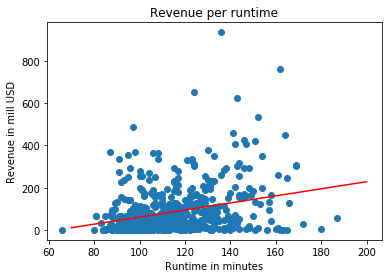

In [25]:
#runtime
x_train_runtime, x_test_runtime, y_train_runtime, y_test_runtime = train_test_split(x_runtime, y_value_revenue, test_size = (1/3), train_size = (2/3))
model_runtime = LinearRegression()

model_runtime.fit(x_train_runtime, y_train_runtime)
plt.scatter(x_train_runtime, y_train_runtime)

plt.plot([70, 200],[model_runtime.predict([[70]]), model_runtime.predict([[200]])], color = "red")
plt.title('Revenue per runtime')
plt.xlabel('Runtime in minutes')
plt.ylabel('Revenue in mill USD')

plt.show()

# Linear regression is probably not the correct choice for this plot. A bell curve seems more appropriate

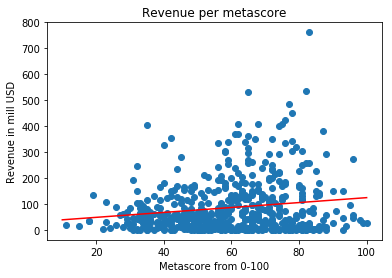

In [17]:
#metascore
x_train_metascore, x_test_metascore, y_train_metascore, y_test_metascore = train_test_split(x_metascore, y_value_revenue, test_size = (1/3), train_size = (2/3))
model_metascore = LinearRegression()

model_metascore.fit(x_train_metascore, y_train_metascore)
plt.scatter(x_train_metascore, y_train_metascore)

plt.plot([10, 100],[model_metascore.predict([[10]]), model_metascore.predict([[100]])], color = "red")
plt.title('Revenue per metascore')
plt.xlabel('Metascore from 0-100')
plt.ylabel('Revenue in mill USD')

plt.show()

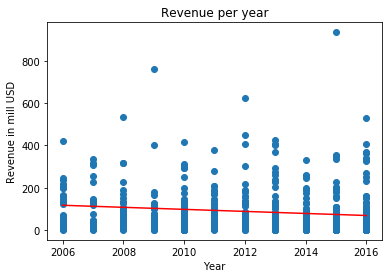

In [18]:
#year
x_train_year, x_test_year, y_train_year, y_test_year= train_test_split(x_year, y_value_revenue, test_size = (1/3), train_size = (2/3))
model_year = LinearRegression()

model_year.fit(x_train_year, y_train_year)
plt.scatter(x_train_year, y_train_year)

plt.plot([2006, 2016],[model_year.predict([[2006]]), model_year.predict([[2016]])], color = "red")
plt.title('Revenue per year')
plt.xlabel('Year')
plt.ylabel('Revenue in mill USD')

plt.show()

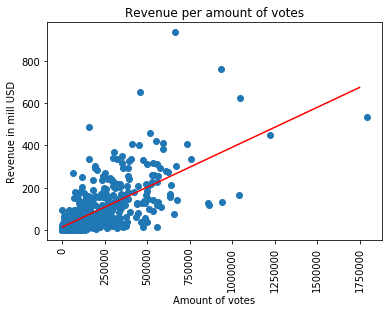

In [20]:
#vote
x_train_votes, x_test_votes, y_train_votes, y_test_votes = train_test_split(x_votes, y_value_revenue, test_size = (1/3), train_size = (2/3))
model_votes = LinearRegression()

model_votes.fit(x_train_votes, y_train_votes)
plt.scatter(x_train_votes, y_train_votes)

plt.plot([0, 1750000],[model_votes.predict([[0]]), model_votes.predict([[1750000]])], color = "red")
plt.title('Revenue per amount of votes')
plt.xlabel('Amount of votes')
plt.ylabel('Revenue in mill USD')
plt.xticks(rotation = 90)

plt.show()



### Reflection

Looking at the different plots we see a difference in correlation between the x-values and the revenue.

**Rating**  
The rating seems to have a correlation, but it seems more like a exponetial regression would have fit better.

**Runtime**  
This seem to fit more a bell-curve than a linear regression, where the majority of revenue is situated in the middle runtime values.

**Metascore**  
The metascore does not seem to have a very big influence on the revenue. This makes sense, since moviegoers seem to watch what they like independently of the critics opinions.

**Year**  
The release-year seems to have almost no influence on the revenue.

**Votes**  
The only one that has great correlation is the amount of votes. This makes sense, as the more voters there are, the more people should have seen the movie. Hence a bigger revenue.



### 3. Now take the test-data, test the model and evaluate how accurate the model is.

In [41]:
# Splitting the data and fitting the model
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_no_revenue, y_value_revenue, train_size=2/3, test_size=1/3)
model = LinearRegression()
model.fit(x_train_all, y_train_all)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
# Calculating the score of the model to see how accurately it predicts revenue from data.
model.score(x_test_all, y_test_all)

0.5195650896580716

### Model conclusion

When splitting the data and calculating the score repeatedly, the score ranges from around 0.3-0.52. This is not a very good model for predicting revenue. Though it is not completely horrible, but definitely unreliable.